<h1>TASK 1</h1>

<h2><i>Getting the data and visualizing it</i></h2>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data1 = pd.read_csv(path)
data1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data1.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


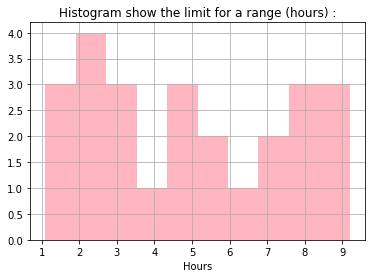

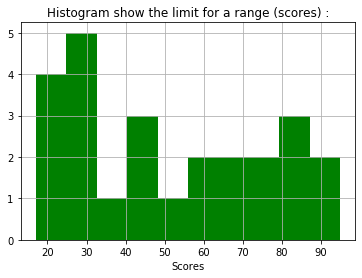

In [5]:
data1.Hours.hist(color = 'lightpink')
plt.xlabel('Hours')
plt.title('Histogram show the limit for a range (hours) :')
plt.show()
data1.Scores.hist(color = 'green')
plt.xlabel('Scores')
plt.title('Histogram show the limit for a range (scores) :')
plt.show()

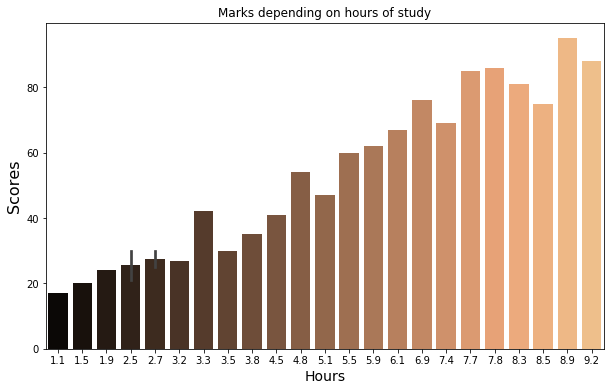

In [6]:
plt.figure(figsize = (10,6))
sns.barplot(x = data1['Hours'], y = data1['Scores'], palette= 'copper')
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 16)
plt.title("Marks depending on hours of study")
plt.show()

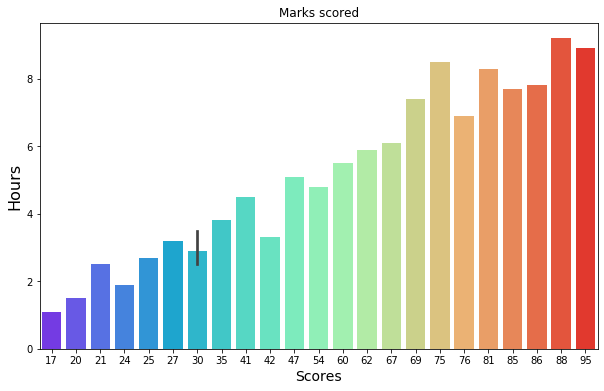

In [7]:
plt.figure(figsize = (10,6))
sns.barplot(x = data1['Scores'], y = data1['Hours'], palette= 'rainbow')
plt.xlabel('Scores', fontsize = 14)
plt.ylabel('Hours', fontsize = 16)
plt.title("Marks scored")
plt.show()

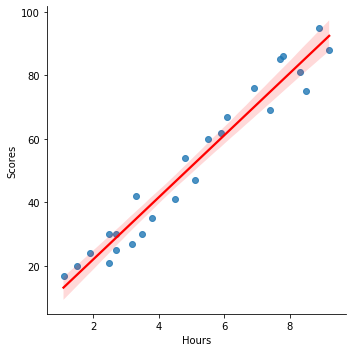

In [8]:
sns.lmplot(x = 'Hours', y = 'Scores', data = data1, line_kws={'color': 'red'})
plt.show()

<ol><h1>Steps involved in building a model</h1>
<li><h4><i>Define</i></h4>
<li><h4><i>Fit</i></h4>
<li><h4><i>Predict</i></h4>
<li><h4><i>Evaluate</i></h4>
</ol>

<h1>1. Define</h1>

In [9]:
#Getting the first column
X = data1.iloc[:, :-1].values  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
#Getting the second column
y = data1.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2,random_state = 0)

<h1>Training the data</h1>

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

<h1>2. Fit</h1>

In [13]:
reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h1>3. Predict</h1>

In [14]:
predict = reg.predict(val_X)
predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
result = pd.DataFrame({'Actual': val_y,'Result': predict})
result.head()

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
reg.score(train_X, train_y)

0.9515510725211553

In [21]:
print('Coefficients:', reg.coef_)
print('\nIntercept:', reg.intercept_)

Coefficients: [9.91065648]

Intercept: 2.018160041434683


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error:', mean_squared_error(val_y, predict))
print('\nMean Absolute Error:', mean_absolute_error(val_y, predict))
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(val_y, predict)))

Mean Squared Error: 21.5987693072174

Mean Absolute Error: 4.183859899002975

Root Mean Squared Error: 4.6474476121003665


<h1>4. Evaluate</h1>

In [25]:
hrs = [[9.25]]
hr_predict = reg.predict(hrs)
print('Numbers of hours studied:{}'.format(hrs))
print('\nScores:{}'.format(hr_predict))

Numbers of hours studied:[[9.25]]

Scores:[93.69173249]


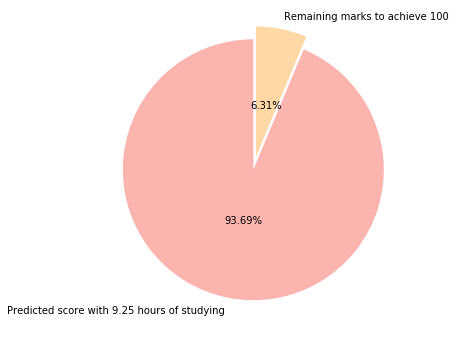

In [56]:
labels = ['Predicted score with 9.25 hours of studying','Remaining marks to achieve 100']
values = [93.6917,6.3083]
fig1, ax1 = plt.subplots(figsize=(6,6))
theme = plt.get_cmap('Pastel1')
ax1.set_prop_cycle("color", [theme(1. * i / len(values))
                             for i in range(len(values))])
plt.pie(values, labels = labels,autopct = "%0.2f%%", explode = [0, 0.1], startangle = 90,pctdistance=0.4)
plt.show()